<font size='6px'> Train</font> 


In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, LSTM, Dense,Dropout, Flatten,TimeDistributed
from keras.layers import Activation,Bidirectional
from keras.models import Sequential
from keras import losses

import numpy as np
from utils import readXY,CustomBatchGenerator

Using TensorFlow backend.


<font size='2px' color='red'> retraining already trained model (8 epochs completed)</font> 

In [2]:
# fix random seed for reproducibility
seed = 9
np.random.seed(seed)

def Customloss(y_true,y_pred):
    loss = losses.categorical_crossentropy(y_true, y_pred)
    
def Customloss(y_true,y_pred):
    loss = losses.categorical_crossentropy(y_true, y_pred)
    
    loss = tf.Print(loss,[y_true,y_pred], message="y_true\ty_pred \t", summarize=1000)
    #loss = tf.Print(loss,[loss], message="loss \t", summarize=1000)
    return loss

def CreateModel(dimensions,timesteps=None):
    model = Sequential()
    model.add(LSTM(32,  input_shape=(timesteps,dimensions),\
                   activation='tanh', return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(16,return_sequences=False))
    model.add(Dropout(0.2))
    #model.add(TimeDistributed(Dense(2)))
    #model.add(Activation('sigmoid'))
    model.add(Dense(2, activation='sigmoid'))

    return model

model = CreateModel(dimensions=15)

#model as been already trained for 8 epochs
model.load_weights("Parkclassifier_weights.h5")
model.compile(loss=Customloss, optimizer='adam', metrics=['accuracy'])

print(model.summary())


#x_path = "F:/parkisons/code/processed_dataset/furtherProcessed_tappy_data/"
#x_path = "F:/parkisons/code/processed_dataset/tappy_data/"

x_path = "F:/parkisons/code/processed_dataset/dataset_final_0_30__1_30/"
y_path = "F:/parkisons/code/processed_dataset/User_details.xlsx"

X, Y = readXY(x_path,y_path)


# Removing user files which dont have Y data
Y_dict = {}
for row in Y:
    Y_dict[row[0]]= row
Ylist = Y_dict.keys()

x_temp = [] 
for i in X:
    temp = i.split('_')[0]
    if  temp not in Ylist:
        x_temp.append(i)

for i in x_temp:
    X.remove(i)


X = np.asarray(X)
# shuffle the X data
np.random.shuffle(X)

# Setting paramteres
batchSize = 1
epochs = 1

# Dividing dataset into train and test/validation
total = len(X)
train_end = int(total*0.95) # 95% as train data
print(total)
X_train, X_test = X[:train_end], X[train_end:]

# getting number of of steps per epochs in train and test cases
train_steps = int(train_end/batchSize)
test_steps = int((total - train_end)/batchSize)


# Creating train and test batch Generator 
train_Gen = CustomBatchGenerator(X_train,Y,x_path,batchSize)
test_Gen = CustomBatchGenerator(X_test,Y,x_path,batchSize)

print("Start Trainig: ")
model.fit_generator(generator = train_Gen, 
                    steps_per_epoch  = train_steps, 
                    epochs= epochs,
                    validation_data=test_Gen, 
                    validation_steps=test_steps)

model.save_weights("Parkclassifier_weights.h5", overwrite=True)

model.save('Parkclassifier_model.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 32)          6144      
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
Total params: 9,314
Trainable params: 9,314
Non-trainable params: 0
_________________________________________________________________
None
60
Start Trainig: 
Epoch 1/1
56/57 [============================>.] - ETA: 2:52 - loss: 0.6002 - acc: 0.6786epoch Ended:  57
epoch Ende

Image displaying true and predicted value in shell running Jupyter notebook 



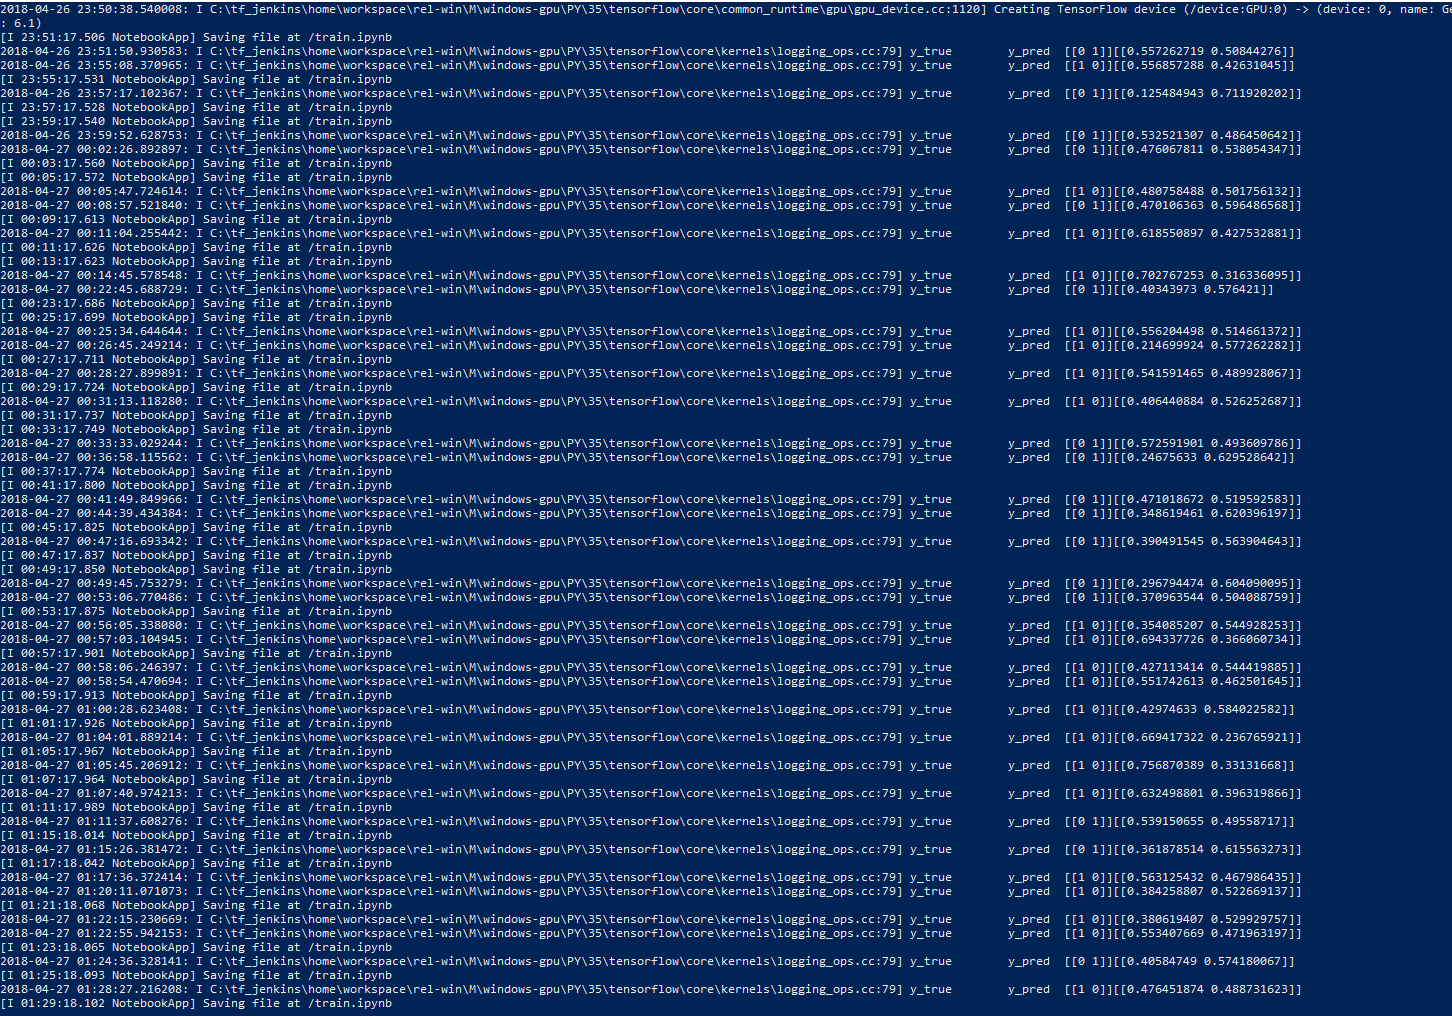

In [4]:
from IPython.display import Image

print("Image displaying true and predicted value in shell running Jupyter notebook \n")
Image(filename='shell_1.png')

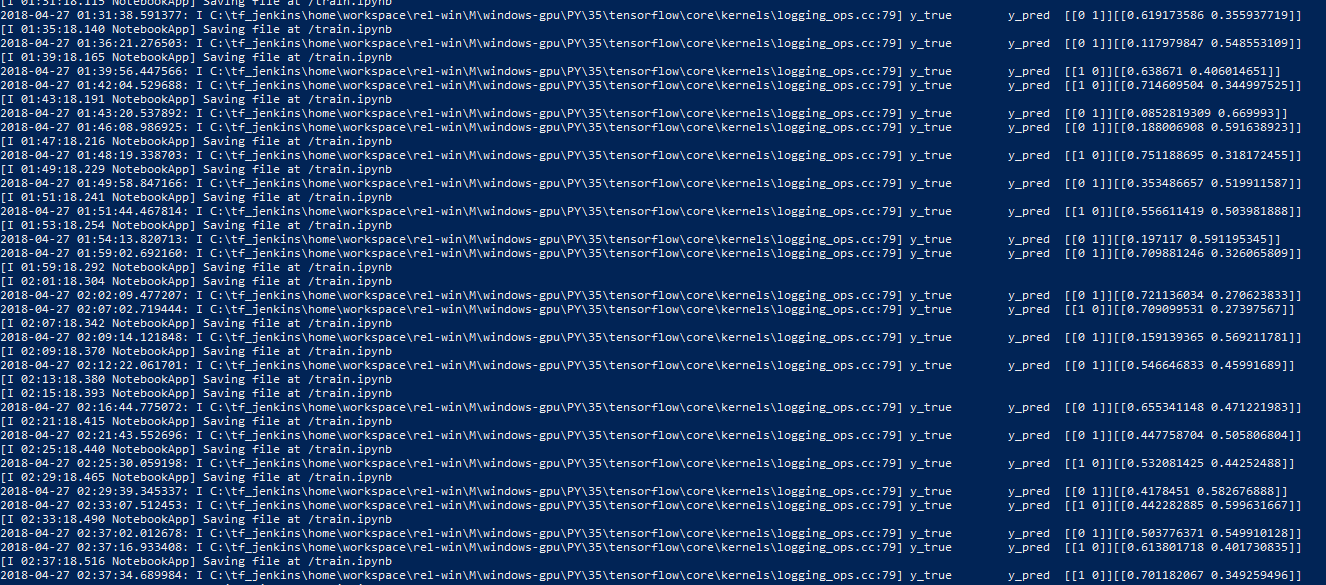

In [5]:
Image(filename='shell_2.png')